In [1]:
import pandas as pd

file_path = '/Users/kusumsaichowdary/Downloads/BankChurners.csv'
data = pd.read_csv(file_path)

data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [2]:
income_attrition = data.groupby(['Income_Category', 'Attrition_Flag']).size().unstack()

income_attrition['Attrition Rate'] = income_attrition['Attrited Customer'] / (income_attrition['Existing Customer'] + income_attrition['Attrited Customer'])
income_attrition = income_attrition.sort_values(by='Attrition Rate', ascending=False)

income_attrition


Attrition_Flag,Attrited Customer,Existing Customer,Attrition Rate
Income_Category,,,
$120K +,126,601,0.173315
Less than $40K,612,2949,0.171862
Unknown,187,925,0.168165
$80K - $120K,242,1293,0.157655
$40K - $60K,271,1519,0.151397
$60K - $80K,189,1213,0.134807


1. $120K+ Income Category (17.33% attrition rate):

- Observation: This is the highest income bracket and also shows the highest attrition rate.
- Possible Reasons: Customers in this bracket may have higher expectations and demands for service quality, investment options, and personalized banking experiences. They might be more likely to switch institutions for better offerings or rates.
- Implications: The bank may need to enhance its premium services, offer more competitive rates, and provide tailored financial advice to retain these high-income clients.




2. Less than $40K Income Category (17.19% attrition rate):

- Observation: This is the lowest income bracket and has a nearly equivalent high attrition rate as the highest income bracket.
- Possible Reasons: Customers in this bracket might be more sensitive to fees, may have higher financial stress, and could be more impacted by economic factors. They might switch institutions for lower costs or more accessible services.
- Implications: The bank could focus on offering financial products with low or no fees, financial literacy programs, and more accessible customer service options to retain clients in this bracket.



3. Unknown Income Category (16.82% attrition rate):

- Observation: A significant attrition rate in this category suggests that a portion of the bank’s clientele has not disclosed their income.
- Possible Reasons: These clients might not have a steady income or may prefer not to disclose their financial details, possibly due to privacy concerns.
- Implications: The bank could consider policies that respect client privacy while offering generalized financial products that cater to a wide range of needs.

4. $80K - $120K Income Category (15.77% attrition rate):

- Observation: This upper-middle income bracket shows a lower attrition rate compared to the highest and lowest income categories.
- Possible Reasons: Clients in this bracket might have found a balance between the services offered and their financial needs. They could be less likely to switch due to a perceived value in the services received.
- Implications: Maintaining a good balance of service quality and cost could be key to retaining these clients.

5. $40K - $60K Income Category (15.14% attrition rate):

- Observation: This middle-income bracket shows a relatively lower attrition rate.
- Possible Reasons: Customers in this bracket might be more stable in their financial choices, seeking long-term relationships with their financial institution. They might value consistency and reliability over high-end services.
- Implications: Providing consistent, reliable, and value-for-money services could be crucial for retaining customers in this income bracket.

4. $60K - $80K Income Category (13.48% attrition rate):

- Observation: This bracket has the lowest attrition rate among all the income categories.
- Possible Reasons: Customers in this income range may feel that their needs are adequately met by the bank's current offerings. They might find the balance between service fees, interest rates, and the benefits they receive to be satisfactory.
- Implications: Understanding what works well for this group and applying similar strategies to other segments could help reduce attrition rates across other income brackets.

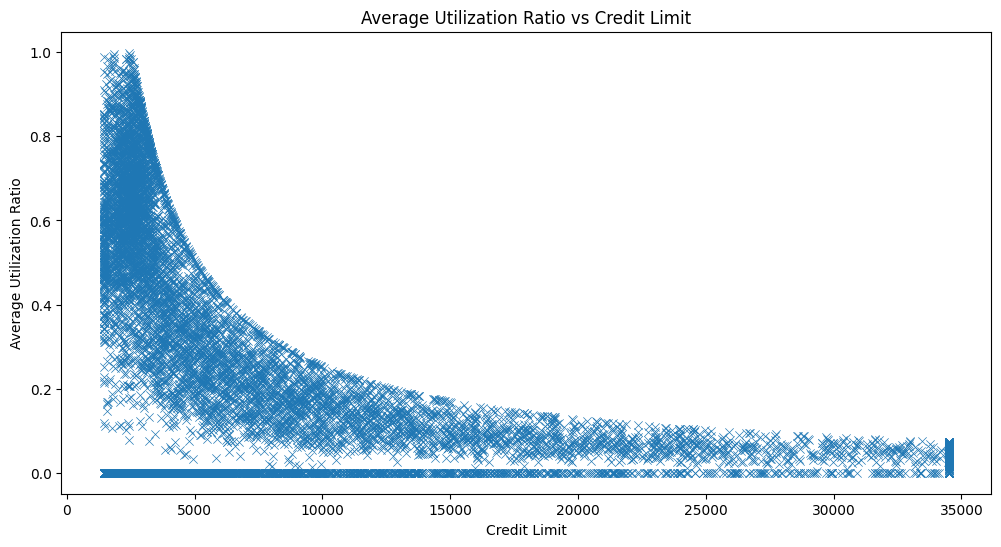

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a scatter plot for Avg Utilization Ratio vs Credit Limit
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Credit_Limit', y='Avg_Utilization_Ratio', data=data, marker='x')
plt.title('Average Utilization Ratio vs Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Average Utilization Ratio')
plt.show()


Observations:

- The plot likely shows a wide distribution of data points across different credit limits. This diversity indicates that customers with varying credit limits are included in the dataset, from those with low credit limits to those with significantly higher limits.

- A common trend in such analyses is that customers with lower credit limits tend to have higher utilization ratios. This might be because these customers rely more heavily on their credit facilities.
- Conversely, customers with higher credit limits might exhibit lower utilization ratios, possibly indicating that they do not need to use a large portion of their available credit. This could be due to better financial stability or access to alternative funding sources.

- A higher utilization ratio can be a warning sign of potential credit risk, as it might indicate over-reliance on credit facilities. Monitoring customers with high utilization ratios, especially those with lower credit limits, might be crucial for managing credit risk.

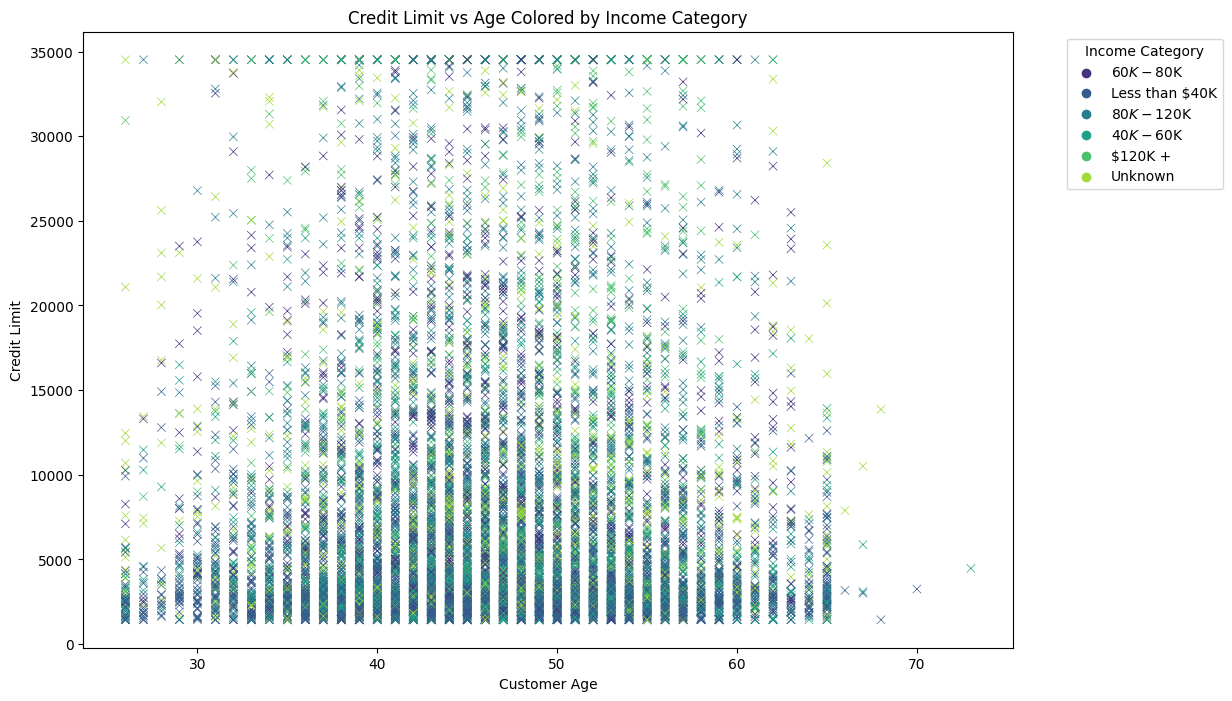

In [9]:
# Creating a scatter plot for Credit Limit vs Age, colored by Income Category
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Customer_Age', y='Credit_Limit', hue='Income_Category', data=data, palette='viridis', marker='x')
plt.title('Credit Limit vs Age Colored by Income Category')
plt.xlabel('Customer Age')
plt.ylabel('Credit Limit')
plt.legend(title='Income Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


- The credit limit seems to be widely distributed across all age groups. There is no clear age trend where the credit limit consistently increases or decreases with age.

- There is a dense concentration of credit limits between approximately $5,000 and $20,000, which could suggest that this range is the most commonly approved credit limit by the institution, regardless of age or income.

- The data points for the unknown income category are spread across all credit limits and ages, indicating that credit limit approval in this category does not follow a discernible pattern based on the available data.

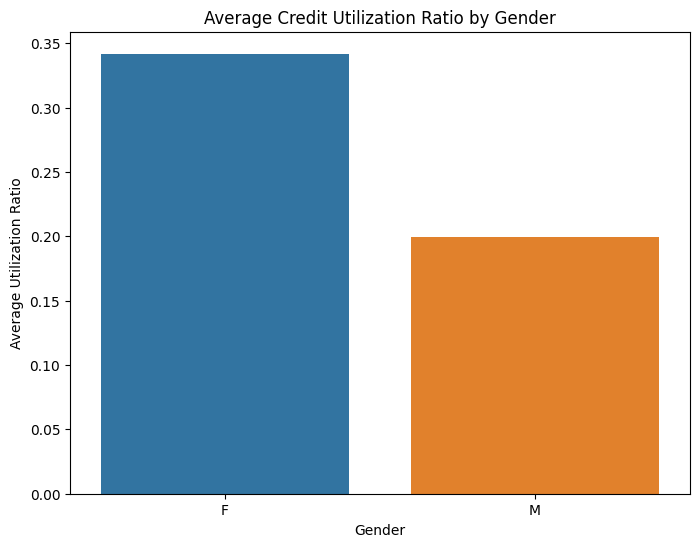

In [10]:
# Creating a bar plot for Average Utilization Ratio by Gender
avg_utilization_by_gender = data.groupby('Gender')['Avg_Utilization_Ratio'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Avg_Utilization_Ratio', data=avg_utilization_by_gender)
plt.title('Average Credit Utilization Ratio by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Utilization Ratio')
plt.show()


- The height of each bar represents the mean utilization ratio for male and female customers. A higher bar for one gender indicates a higher average credit utilization ratio compared to the other.
- Gender Female has a noticeably higher average utilization ratio, it suggests that this group, on average, tends to use a larger proportion of their available credit limit.

### Credit Utilization Across gender

Null hypothesis : The mean credit utilization ratio is the same for both genders.

Alternative hypothesis : The mean credit utilization ratio is different for males and females.

To test this hypothesis, 

we'll use the independent two-sample t-test. This test will help us determine if there's a statistically significant difference in the mean credit utilization ratio (Avg_Utilization_Ratio) between males and females.



In [11]:
from scipy.stats import ttest_ind

male_data = data[data['Gender'] == 'M']['Avg_Utilization_Ratio']
female_data = data[data['Gender'] == 'F']['Avg_Utilization_Ratio']

t_stat, p_value = ttest_ind(male_data, female_data)

t_stat, p_value


(-26.85380811729272, 1.6653873266473568e-153)

#### The very low p-value (far less than 0.05) suggests that we reject the null hypothesis that the mean credit utilization ratios are the same for both genders. This indicates that there is a statistically significant difference in the average credit utilization ratios between male and female customers in your dataset.

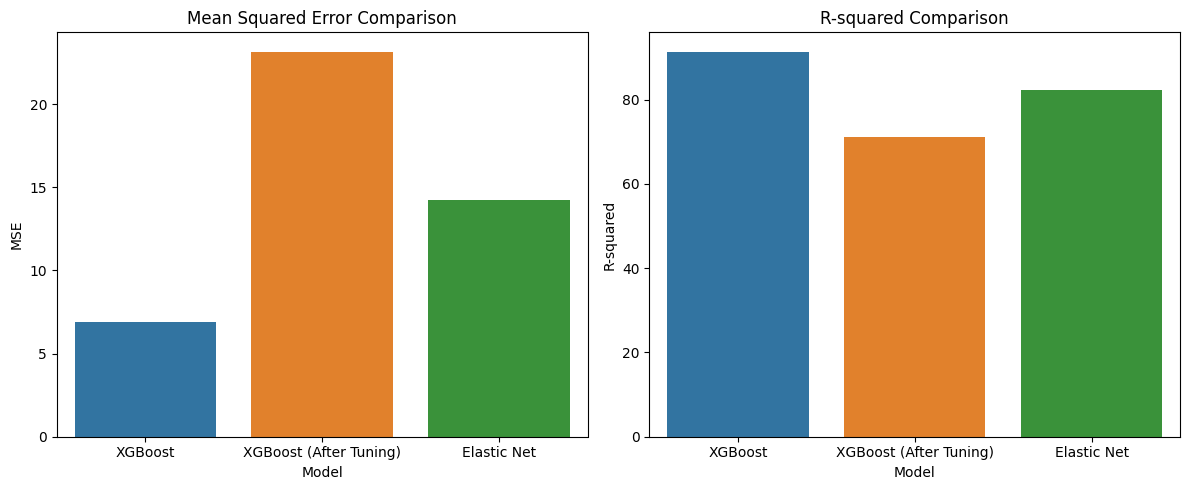

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model names
models = ['XGBoost', 'XGBoost (After Tuning)', 'Elastic Net']

# MSE values
mse_values = [6.90, 23.16, 14.26]

# R-squared values
r2_values = [91.42, 71.18, 82.25]

# Create a DataFrame for easier plotting
results_df = pd.DataFrame({'Model': models, 'MSE': mse_values, 'R-squared': r2_values})

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot Mean Squared Error
sns.barplot(x='Model', y='MSE', data=results_df, ax=axes[0])
axes[0].set_title('Mean Squared Error Comparison')

# Plot R-squared
sns.barplot(x='Model', y='R-squared', data=results_df, ax=axes[1])
axes[1].set_title('R-squared Comparison')

# Adjust layout
plt.tight_layout()

# Save the figure as an image
plt.savefig('model_comparison.png')

# Show the plot
plt.show()

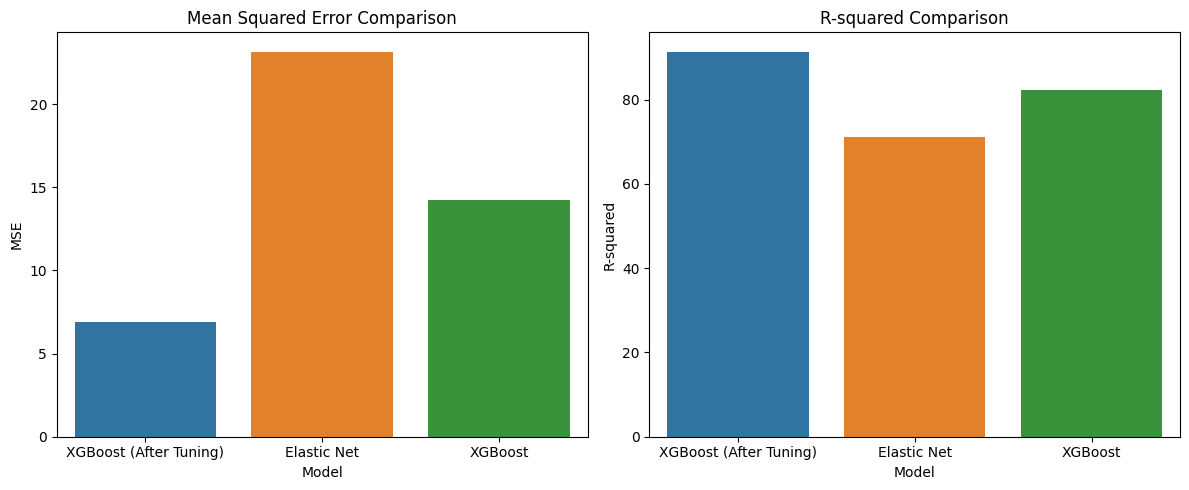

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model names
models = [ 'XGBoost (After Tuning)', 'Elastic Net', 'XGBoost']

# MSE values
mse_values = [6.90, 23.16, 14.26]

# R-squared values
r2_values = [91.42, 71.18, 82.25]

# Create a DataFrame for easier plotting
results_df = pd.DataFrame({'Model': models, 'MSE': mse_values, 'R-squared': r2_values})

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot Mean Squared Error
sns.barplot(x='Model', y='MSE', data=results_df, ax=axes[0])
axes[0].set_title('Mean Squared Error Comparison')

# Plot R-squared
sns.barplot(x='Model', y='R-squared', data=results_df, ax=axes[1])
axes[1].set_title('R-squared Comparison')

# Adjust layout
plt.tight_layout()

# Save the figure as an image
plt.savefig('model_comparison.png')

# Show the plot
plt.show()